In [6]:
import sys
# need to add cocpit dir to path - can't relative import with sister directory
sys.path.insert(0, "..") 

import cocpit.predictions as predictions
import cocpit.config as config
import cocpit.plot as plot

import itertools
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")


import torch
from sklearn.metrics import confusion_matrix
import matplotlib.cm as cm
from matplotlib.colors import Normalize

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
plt_params = {
    "axes.labelsize": "xx-large",
    "axes.titlesize": "xx-large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
    "legend.title_fontsize": 12,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

# confusion matrices from folds

In [9]:
"""
iterate through each fold and append predictions and actual labels
changing saved model and validation data each time
"""
kfolds = 1
all_preds = []
all_labels = []
for fold in range(kfolds):
    val_data = torch.load(
            f"{config.VAL_LOADER_SAVE_DIR}e{config.MAX_EPOCHS}"\
            f"_val_loader20_bs{config.BATCH_SIZE}"\
            f"_k{str(fold)}_vgg16.pt"
    )

    model_name = f"{config.MODEL_SAVE_DIR}e{config.MAX_EPOCHS}"\
                f"_bs{config.BATCH_SIZE}"\
                f"_k{str(fold)}_vgg16.pt"
    
    model = torch.load(model_name).cuda()
    result = model_name.find("bs")
    batch_size = int(model_name[result + 3 : result + 5])

    # get predictions from val loader
    preds, labels = predictions.val_loader_predictions(
        model, val_data, batch_size
    )
    all_preds.append(preds)
    all_labels.append(labels)

In [10]:
all_labels = list(itertools.chain(*all_labels))
all_preds = list(itertools.chain(*all_preds))

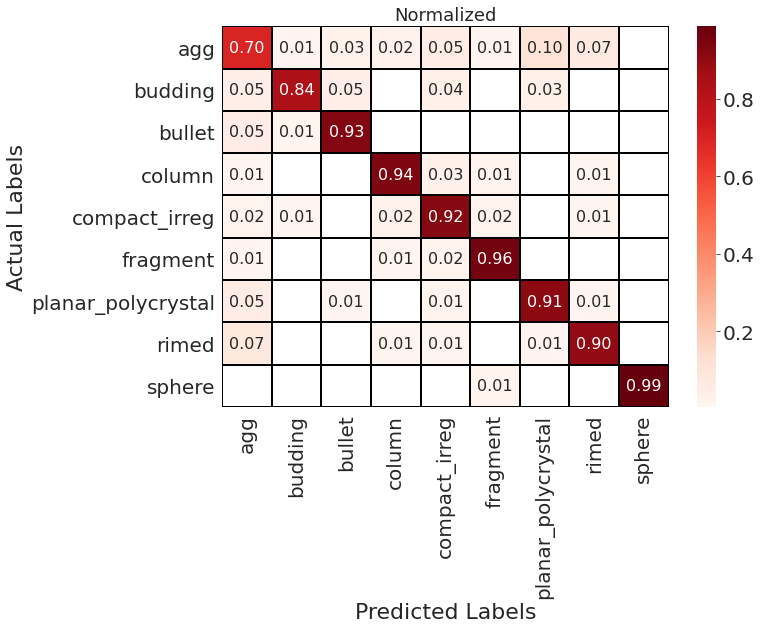

In [11]:
# plot/save conf matrix
save_name = "/data/data/plots/conf_matrix_allfolds.pdf"

cocpit.plot_metrics.conf_matrix(
    all_labels, all_preds, norm='true', save_name=save_name, save_fig=True
)

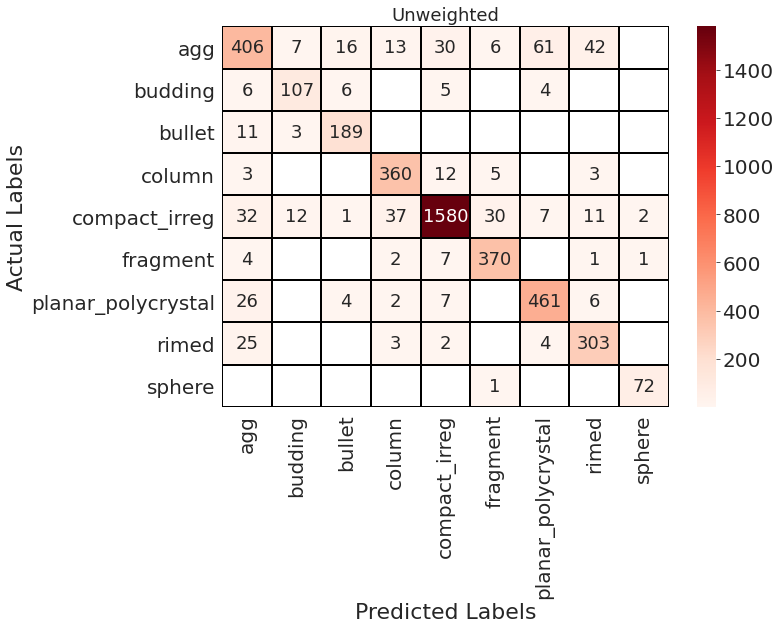

In [12]:
# plot/save conf matrix
save_name = "/data/data/plots/conf_matrix_allfolds.pdf"

cocpit.plot_metrics.conf_matrix(
    all_labels, all_preds, norm=None, save_name=save_name, save_fig=True
)

### plot confusion matrix on one validation dataloader (no folds)

In [15]:
"""
iterate through each fold and append predictions and actual labels
changing saved model and validation data each time
"""

val_data = torch.load(config.VAL_LOADER_SAVENAME)
model = torch.load(config.MODEL_SAVENAME).cuda()
result = config.MODEL_SAVENAME.find("bs")
batch_size = int(config.MODEL_SAVENAME[result + 2 : result + 4])

# get predictions from val loader
all_preds, all_labels = predictions.val_loader_predictions(
    model, val_data, batch_size
)